In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inputs

In [2]:
# clients = pd.read_csv("../data/clientes.txt")
clients = pd.read_table('../data/clientes.txt', delimiter = '\t')

In [3]:
clients.head()

,ID,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10
0,1,21,80,37,27,5,38,55,7,4,54
1,2,23,83,37,30,12,32,61,10,9,48
2,3,22,96,35,28,3,32,64,6,4,50
3,4,71,58,34,26,6,88,13,1,0,20
4,5,22,84,32,29,14,31,52,19,4,48


In [4]:
X = clients.drop(["ID"], axis=1)

# Clusterizing

- **How many brands should the company be divided into and why?**
- How to find the brands?
    - by clusterizing the clients
        - we can use `k-mean`, and the optimal k is the number of brands

Here we use the **Elbow curve** to find the optimal number of brands.

In [5]:
distortions = []
inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_)

    mapping[k] = kmeanModel.inertia_

In [6]:
# Using the different values of Inertia
for key, val in mapping.items():
    print(f'{key} : {val}')

1 : 30538417.072599992
2 : 8934529.843666669
3 : 3256412.795666667
4 : 2320245.0793321044
5 : 1857350.6842902699
6 : 1687484.251847513
7 : 1536412.5258557561
8 : 1447259.2641479187
9 : 1385219.6655867514


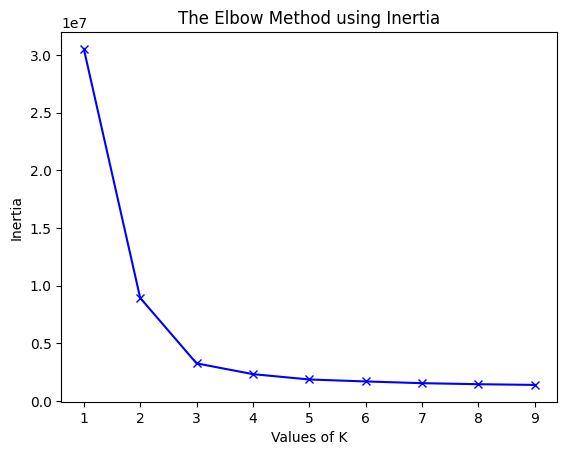

In [7]:
# Inertia: It is the sum of squared distances of samples to their closest cluster center
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Visually, we found the ideal number of brands is 3.

# EDA

- **What percentage of customers will be under the banner of each brand?**
    - This is the number of clients in each cluster

In [8]:
nb_brands = 3
kmeans = KMeans(n_clusters=nb_brands, random_state=0).fit(X)
kmeans.labels_

# kmeans.predict([[0, 0], [12, 3]])

# kmeans.cluster_centers_

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)

In [9]:
X["brand"] = kmeans.labels_

This is the number of clients in each brand:

In [10]:
X["brand"].value_counts()

1    6000
2    3000
0    1000
Name: brand, dtype: int64

- **What is the purchasing profile of each brand's customers?**
    - We can look at the products distribution in each cluster in the EDA.

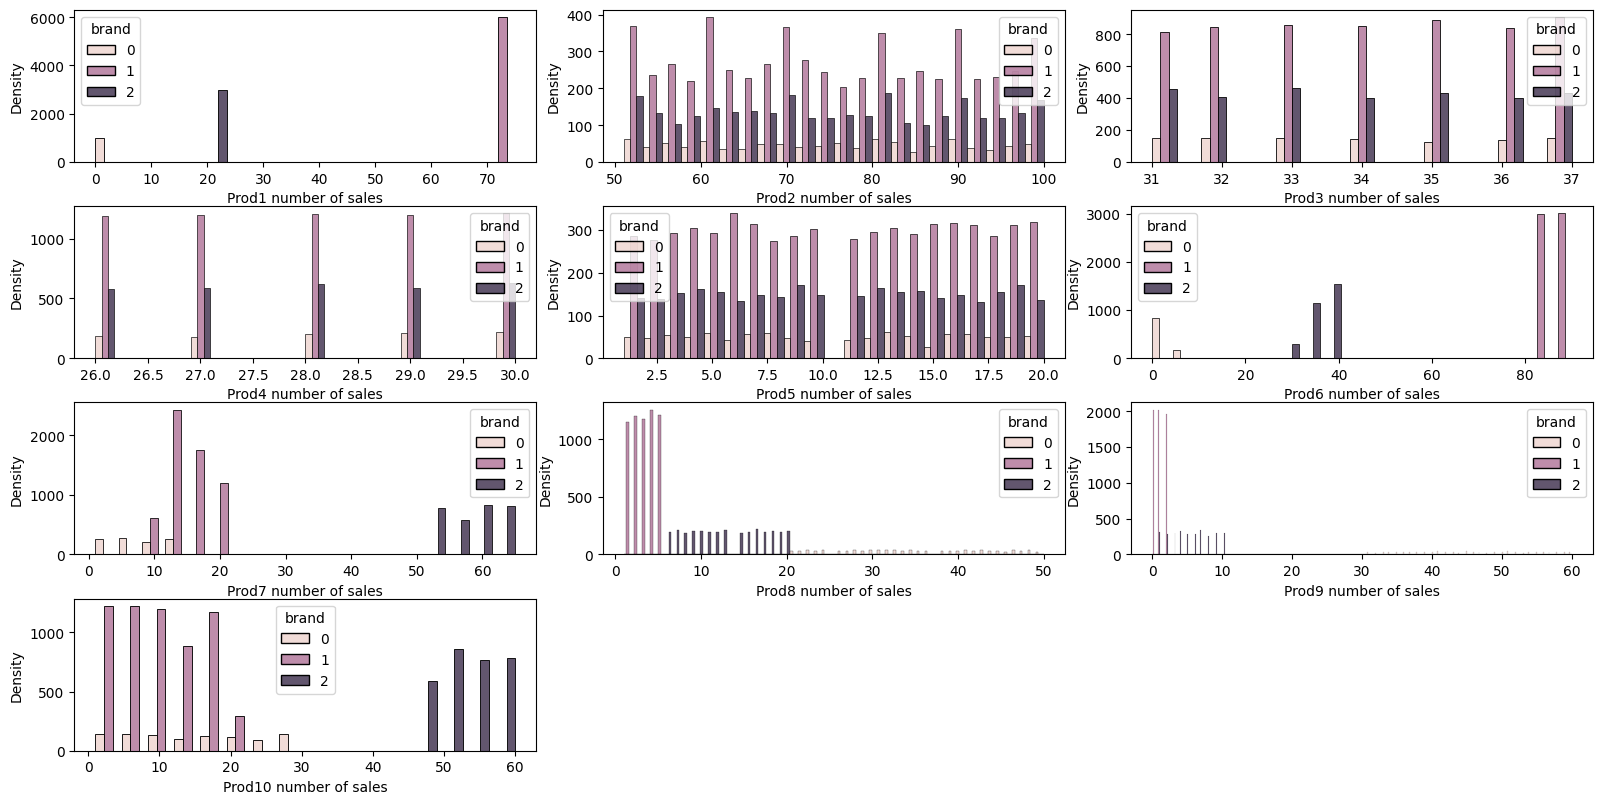

In [32]:
nplots = 10
nrows = 4
ncols = 3
k = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8))
fig.tight_layout()
for i in range(nrows):
    for j in range(ncols):
        if k + i + j > 10:
            break
        sns.histplot(data=X, x="Prod" + str(k + i + j), hue="brand", ax=ax[i, j], multiple="dodge")
        ax[i, j].set_ylabel('Density')
        ax[i, j].set_xlabel("Prod" + str(k + i + j) + " number of sales")
    k += ncols - 1

for i in range(nplots % 3, ncols):
    fig.delaxes(ax[nrows - 1, i])

plt.show()